실습1

In [2]:
import numpy as np
import pandas as pd

data = {'unit price':[1000,280,900],
       'number':[25,120,30]}
df = pd.DataFrame(data,index=['store1','store2','store3'])
df['total price']=df['unit price']*df['number']

max = df['total price'][0]

for i in df['total price']:
    if (i > max):
        max = i
print(max)
df.loc[df['total price']>=max]

33600


,unit price,number,total price
store2,280,120,33600


In [8]:
a = np.arange(10).reshape(2,5)
b = np.arange(10).reshape(2,5)
print(a)

c = np.dot(a,b.T)
print(c)
c = np.dot(b.T,a)
print(c)
d = np.dot(a.T,b)
print(d)
d = d-10
print(d)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[ 30  80]
 [ 80 255]]
[[25 30 35 40 45]
 [30 37 44 51 58]
 [35 44 53 62 71]
 [40 51 62 73 84]
 [45 58 71 84 97]]
[[25 30 35 40 45]
 [30 37 44 51 58]
 [35 44 53 62 71]
 [40 51 62 73 84]
 [45 58 71 84 97]]
[[15 20 25 30 35]
 [20 27 34 41 48]
 [25 34 43 52 61]
 [30 41 52 63 74]
 [35 48 61 74 87]]


In [14]:
df = pd.DataFrame(np.random.rand(3,2), index = ['m1','m2','m3'], columns = ['price','num'])

df.loc[df['price']>0.3]

,price,num
m1,0.572508,0.520900
m2,0.361892,0.660775


In [17]:
df = pd.DataFrame(np.random.rand(3,2), index = ['m1','m2','m3'], columns = ['price','num'])

df2 = df[df['price']>0.3]
print(df2)

       price       num
m1  0.365331  0.801666
m2  0.655472  0.848015
m3  0.400886  0.047343


In [18]:
df = pd.DataFrame(np.random.rand(3,2), index = ['m1','m2','m3'], columns = ['price','num'])

df.T

,m1,m2,m3
price,0.547919,0.306708,0.046001
num,0.246860,0.971107,0.172300


In [19]:
df = pd.DataFrame(np.random.rand(3,2), index = ['m1','m2','m3'], columns = ['price','num'])

df['sum'] = np.sum(df, axis=1)
df

,price,num,sum
m1,0.512771,0.176128,0.688899
m2,0.280890,0.453461,0.734351
m3,0.516930,0.918182,1.435113


In [20]:
class Point:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
        
    def show(self):
        print("({0:d},{1:d})".format(self.x,self.y))
        
    def __add__(self,other):
        self.x += other.x
        self.y += other.y
        return self

a = Point(1,2)
a.show()

b = Point(3,4)
b.show()

a = a+b
a.show()

(1,2)
(3,4)
(4,6)


In [21]:
import csv

f = open('Seoul.csv')
data = csv.reader(f)
next(data)

se = [] # 하루하루의 일교차데이터 삽입

for row in data:
    if row[0].split('.')[1] == '5':
        if row[-1] != '' and row[-2] != '':
            se.append(float(row[-1]) - float(row[-2]))

eachWeek=[0]*(len(se)//7 + 1) # 일주일 단위의 일교차 합 데이터 삽입

for i in range(len(se)):
    eachWeek[i//7] += se[i]

maxIdx = 0
for i in range(len(eachWeek)):
    if eachWeek[maxIdx]<eachWeek[i]:
        maxIdx = i


print("Max Week = 5/{0:d} ~ 5/{1:d}".format(maxIdx*7+1,maxIdx*7+7))

f.close()

Max Week = 5/8 ~ 5/14


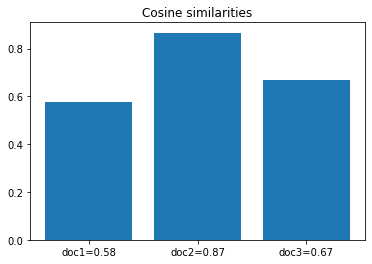

In [22]:
import matplotlib.pyplot as plt
import numpy as np

Docs = [[1,1,0,1,0,1],
       [1,1,1,0,1,0],
       [1,1,0,1,0,0]]
Query = [1,1,0,0,1,0]

sim = [0]*len(Docs)

docSize = [0]*len(Docs)
qSize = np.sqrt(np.dot(Query,Query))

for i in range(len(sim)):
    sim[i] = np.dot(Docs[i],Query)/(np.sqrt(np.dot(Docs[i],Docs[i]))*qSize)
    
xData = ['']*len(sim)

for i in range(len(xData)):
    xData[i] = "doc{0:d}={1:.2f}".format(i+1,sim[i])

plt.bar(xData,sim)
plt.title('Cosine similarities')
plt.show()